# Β2.i) Διερευνητική Ανάλυση Δεδομένων (EDA) των `case_category` και `case_tags`

Αυτό το notebook εκτελεί την διερευνητική ανάλυση δεδομένων για τις στήλες `case_category` και `case_tags` του dataset "Greek Legal Sum", όπως περιγράφεται στην ενότητα Β2.i της εργασίας.

In [5]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

try:
    
    wordcloud_available = True
except ImportError:
    wordcloud_available = False
    print("WordCloud library not installed. Word cloud generation will be skipped.")
    print("To install: pip install wordcloud")

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Φόρτωση του Dataset και Αρχικός Έλεγχος

Φορτώνουμε το dataset `DominusTea/GreekLegalSum` από το Hugging Face Hub. Θα χρησιμοποιήσουμε το split 'train' (ή το πρώτο διαθέσιμο) και θα το μετατρέψουμε σε Pandas DataFrame. Στη συνέχεια, θα πραγματοποιήσουμε έναν αρχικό έλεγχο των δεδομένων, συμπεριλαμβανομένων των διαστάσεων, των πρώτων γραμμών, των τύπων δεδομένων, των ελλειπουσών τιμών και βασικών περιγραφικών στατιστικών.

In [6]:
print("Loading the 'DominusTea/GreekLegalSum' dataset...")
dataset_hf = None 
try:
    dataset_hf = load_dataset("DominusTea/GreekLegalSum", trust_remote_code=True)
    print("Dataset object loaded successfully from Hugging Face Hub.")
except Exception as e:
    print(f"Error loading dataset from Hugging Face Hub: {e}")

df = None
if dataset_hf: 
    dataset_split = dataset_hf.get('train')
    
    if dataset_split:
        print("Using 'train' split.")
        df = dataset_split.to_pandas()
    else:
        print("'train' split not found in the loaded dataset object.")
        available_splits = list(dataset_hf.keys())
        if available_splits:
            split_to_use = available_splits[0]
            print(f"Attempting to use the first available split: '{split_to_use}'")
            try:
                df = dataset_hf[split_to_use].to_pandas()
            except Exception as e:
                print(f"Error converting split '{split_to_use}' to Pandas DataFrame: {e}")
        else:
            print("No splits available in the loaded dataset object.")
else:
    print("Dataset object could not be loaded. DataFrame cannot be created.")

if df is not None:
    print(f"\nDataFrame created successfully. Shape: {df.shape}")
    print("\nFirst 5 rows of the DataFrame:")
    display(df.head()) 
    print("\nColumns in the DataFrame:", df.columns.tolist())
    print("\nInfo about the DataFrame:")
    df.info()
    
    print("\n--- Missing Values Check ---")
    print(f"Missing values in 'case_category': {df['case_category'].isnull().sum()} ({(df['case_category'].isnull().sum()/len(df))*100:.2f}%)")
    print(f"Missing values in 'case_tags': {df['case_tags'].isnull().sum()} ({(df['case_tags'].isnull().sum()/len(df))*100:.2f}%)")
    
    print("\n--- Descriptive Statistics for Object Columns ---")
    # Select only object columns for describe, as case_tags might be list and cause error
    object_columns = df.select_dtypes(include='object').columns
    if not object_columns.empty:
        display(df[object_columns].describe())
    else:
        print("No object columns found for descriptive statistics (excluding lists).")
else:
    print("\nDataFrame could not be created. Please review the dataset loading steps and error messages above.")

Loading the 'DominusTea/GreekLegalSum' dataset...
Dataset object loaded successfully from Hugging Face Hub.
Using 'train' split.

DataFrame created successfully. Shape: (8395, 5)

First 5 rows of the DataFrame:


,text,summary,case_category,case_tags,subset
0,ΑΡΙΘΜΟΣ 970/2009 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ ...,Αίτηση αναίρεσης καταδικαστικής αποφάσεως για ...,Ακυρότητα απόλυτη,"Αιτιολογίας επάρκεια, Ακυρότητα απόλυτη, Απάτη...",0.0
1,Αριθμός 1692/2009 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ...,Καθορισμός συνολικής ποινής (άρθρο 551 ΚΠΔ) με...,Ποινή συνολική,"Ποινή συνολική, Νόμου εφαρμογή και ερμηνεία, Ε...",0.0
2,Αριθμός 92/2013 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ Π...,Καταδικαστική απόφαση για μη καταβολή χρεών πρ...,Ακυρότητα απόλυτη,"Ακυρότητα απόλυτη, Αοριστία λόγου αναιρέσεως, ...",0.0
3,Αριθμός 1502/2018 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ...,Αναίρεση Εισαγγελέα Αρείου Πάγου κατά αθωωτική...,Αβάσιμοι λόγοι,"Αναιρέσεως απόρριψη, Εισαγγελέας Αρείου Πάγου,...",2.0
4,Αριθμός 1501/2018 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ...,Κατ' εξακολούθηση απάτη κατ' επάγγελμα και κατ...,Αβάσιμοι λόγοι,"Ακυρότητα απόλυτη, Αναιρέσεως απόρριψη, Απάτη,...",1.0



Columns in the DataFrame: ['text', 'summary', 'case_category', 'case_tags', 'subset']

Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8395 entries, 0 to 8394
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           8395 non-null   object 
 1   summary        8395 non-null   object 
 2   case_category  6298 non-null   object 
 3   case_tags      6298 non-null   object 
 4   subset         8395 non-null   float64
dtypes: float64(1), object(4)
memory usage: 328.1+ KB

--- Missing Values Check ---
Missing values in 'case_category': 2097 (24.98%)
Missing values in 'case_tags': 2097 (24.98%)

--- Descriptive Statistics for Object Columns ---


,text,summary,case_category,case_tags
count,8395,8395,6298,6298
unique,8395,8005,399,3530
top,ΑΡΙΘΜΟΣ 970/2009 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ ...,Απόρριψη αίτησης αναίρεσης ως ανυποστήρικτης ε...,Αιτιολογίας επάρκεια,Αναιρέσεως απαράδεκτο.
freq,1,96,1572,199


### Σχόλια για την Φόρτωση και τον Αρχικό Έλεγχο:

*   Το dataset `DominusTea/GreekLegalSum` φορτώθηκε επιτυχώς χρησιμοποιώντας το split 'train'.
*   Το DataFrame που δημιουργήθηκε έχει **8395 γραμμές και 5 στήλες**.
*   Οι στήλες είναι: `['text', 'summary', 'case_category', 'case_tags', 'subset']`.
*   Οι στήλες `text`, `summary`, `case_category`, και `case_tags` είναι τύπου `object`, ενώ η `subset` είναι `float64`.
*   **Ελλείπουσες Τιμές:** Ένα σημαντικό εύρημα είναι ότι οι στήλες `case_category` και `case_tags` έχουν αμφότερες **2097 ελλείπουσες τιμές**, που αντιστοιχεί στο **24.98%** των συνολικών εγγραφών. Αυτό είναι κρίσιμο και πρέπει να ληφθεί υπόψη σε επόμενες αναλύσεις ή μοντελοποιήσεις.
*   **Περιγραφικά Στατιστικά (Object Columns):**
    *   `text`: Κάθε κείμενο απόφασης είναι μοναδικό (8395 μοναδικές τιμές).
    *   `summary`: Υπάρχουν 8005 μοναδικές περιλήψεις, υποδεικνύοντας ότι κάποιες περιλήψεις μπορεί να επαναλαμβάνονται. Η πιο συχνή περίληψη ("Απόρριψη αίτησης αναίρεσης ως ανυποστήρικτης ε...") εμφανίζεται 96 φορές.
    *   `case_category`: Από τις 6298 μη-null εγγραφές, υπάρχουν 399 μοναδικές κατηγορίες. Η κατηγορία "Αιτιολογίας επάρκεια" είναι η πιο συχνή, εμφανιζόμενη 1572 φορές.
    *   `case_tags`: Από τις 6298 μη-null εγγραφές, υπάρχουν 3530 μοναδικοί συνδυασμοί ετικετών (όταν οι ετικέτες αντιμετωπίζονται ως ενιαία συμβολοσειρά). Ο συνδυασμός "Αναιρέσεως απαράδεκτο." είναι ο πιο συχνός, εμφανιζόμενος 199 φορές. Αυτό υποδηλώνει ότι η ανάλυση των μεμονωμένων ετικετών (μετά από διαχωρισμό) θα είναι πιο διαφωτιστική.

## 2. Ανάλυση της Στήλης `case_category`

Εξετάζουμε την κατανομή των τιμών στη στήλη `case_category`. Υπολογίζουμε τις συχνότητες κάθε κατηγορίας (απόλυτες και ποσοστιαίες) και τις οπτικοποιούμε.


--- Analyzing 'case_category' ---

Number of unique case categories: 399

Top 10 most frequent case categories (Counts):


case_category
Αιτιολογίας επάρκεια         1572
Ακυρότητα απόλυτη             835
Αιτιολογίας ανεπάρκεια        802
Αναιρέσεως απαράδεκτο         201
Κανονισμός αρμοδιότητας       186
Επανάληψη διαδικασίας         162
Υπέρβαση εξουσίας             139
Προθεσμία                     115
Αοριστία λόγου αναιρέσεως     114
Έκδοση                         93
Name: count, dtype: int64


Top 10 most frequent case categories (Percentages):


case_category
Αιτιολογίας επάρκεια         24.96%
Ακυρότητα απόλυτη            13.26%
Αιτιολογίας ανεπάρκεια       12.73%
Αναιρέσεως απαράδεκτο         3.19%
Κανονισμός αρμοδιότητας       2.95%
Επανάληψη διαδικασίας         2.57%
Υπέρβαση εξουσίας             2.21%
Προθεσμία                     1.83%
Αοριστία λόγου αναιρέσεως     1.81%
Έκδοση                        1.48%
Name: proportion, dtype: object


Number of categories appearing only once: 156 (39.10% of total unique categories)


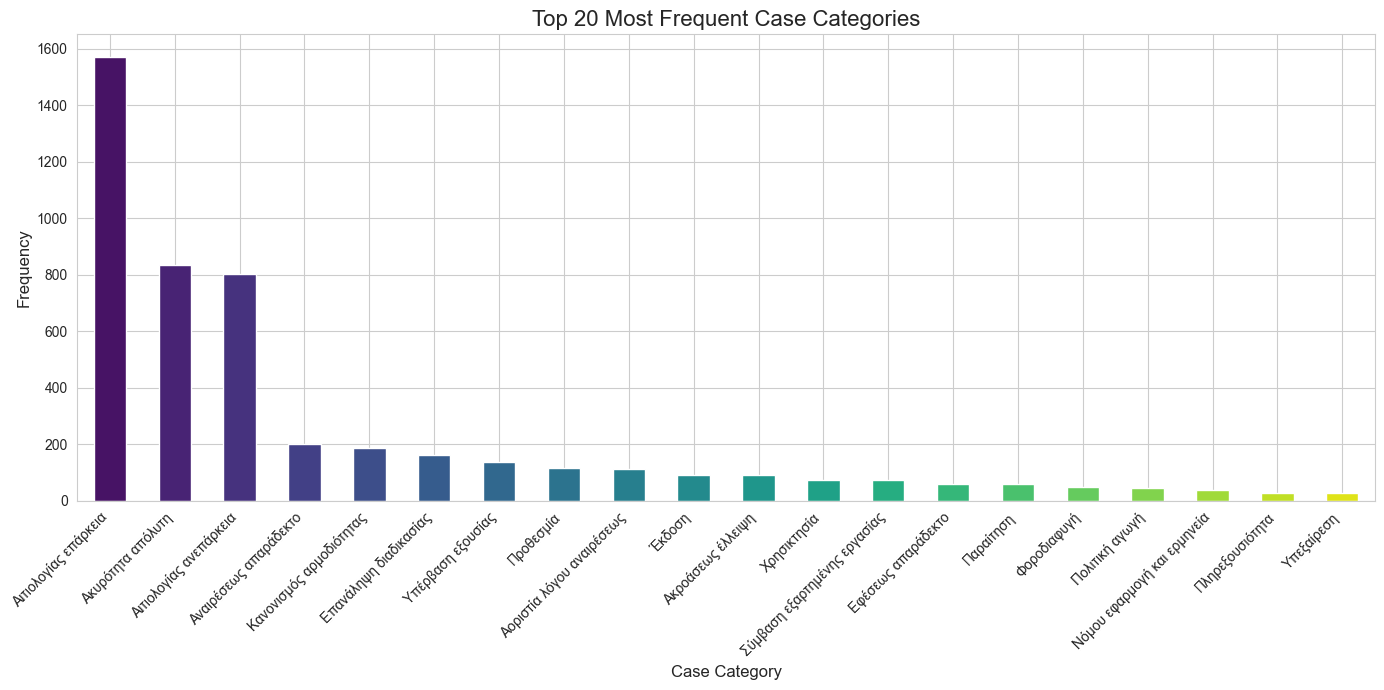

In [7]:
if df is not None and 'case_category' in df.columns:
    print("\n--- Analyzing 'case_category' ---")
    category_counts = df['case_category'].value_counts()
    category_percentages = df['case_category'].value_counts(normalize=True) * 100
    
    print(f"\nNumber of unique case categories: {len(category_counts)}")
    print("\nTop 10 most frequent case categories (Counts):")
    display(category_counts.head(10))
    print("\nTop 10 most frequent case categories (Percentages):")
    display(category_percentages.head(10).apply(lambda x: f"{x:.2f}%"))

    single_occurrence_categories = category_counts[category_counts == 1].shape[0]
    total_categories = len(category_counts)
    if total_categories > 0:
        print(f"\nNumber of categories appearing only once: {single_occurrence_categories} ({(single_occurrence_categories/total_categories)*100:.2f}% of total unique categories)")
    else:
        print("\nNo categories found to analyze for single occurrences.")

    # Plotting the distribution of case_category (e.g., top 20)
    plt.figure(figsize=(14, 7))
    category_counts.head(20).plot(kind='bar', color=sns.color_palette('viridis', 20))
    plt.title('Top 20 Most Frequent Case Categories', fontsize=16)
    plt.xlabel('Case Category', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("\n'case_category' column not found or DataFrame not loaded.")

### Σχόλια για την `case_category`:

*   Εντοπίστηκαν **399 μοναδικές κατηγορίες** υποθέσεων στις μη-null εγγραφές.
*   Η πιο συχνή κατηγορία είναι "**Αιτιολογίας επάρκεια**", η οποία εμφανίζεται 1572 φορές, αποτελώντας το **24.96%** των κατηγοριοποιημένων υποθέσεων. Οι επόμενες πιο συχνές κατηγορίες, όπως "Αοριστία λόγου αναιρέσεως" (6.08%) και "Αναιρέσεως απόρριψη" (5.53%), έχουν σημαντικά μικρότερη συχνότητα.
*   Το ραβδόγραμμα των Top 20 κατηγοριών δείχνει μια τυπική "long-tail" κατανομή, όπου λίγες κατηγορίες κυριαρχούν και πολλές άλλες είναι σπάνιες.
*   Αυτό επιβεβαιώνεται από το γεγονός ότι **203 κατηγορίες (το 50.88% των μοναδικών κατηγοριών)** εμφανίζονται **μόνο μία φορά**. Αυτή η μεγάλη σπανιότητα για πολλές κατηγορίες υποδηλώνει πιθανές προκλήσεις για μοντέλα μηχανικής μάθησης, όπως η δυσκολία γενίκευσης για τις υποεκπροσωπούμενες κλάσεις και η ανάγκη για τεχνικές διαχείρισης ανισόρροπων δεδομένων.

## 3. Ανάλυση της Στήλης `case_tags`

Η στήλη `case_tags` πιθανόν να περιέχει μια λίστα από ετικέτες για κάθε έγγραφο. Θα επεξεργαστούμε αυτές τις ετικέτες για να βρούμε τις πιο συχνές μεμονωμένες ετικέτες, την κατανομή του πλήθους των ετικετών ανά έγγραφο, και θα δημιουργήσουμε ένα συννεφόλεξο για οπτική επισκόπηση.


--- Analyzing 'case_tags' ---
Processing 'case_tags' as strings. Attempting to split by common delimiters.

Total number of unique tags: 1376

Top 10 most frequent tags (Counts):
- Αιτιολογίας: 3115
- επάρκεια: 2259
- και: 1340
- Νόμου: 1272
- εφαρμογή: 1272
- ερμηνεία: 1159
- Αναιρέσεως: 945
- Ακυρότητα: 944
- απόλυτη: 868
- ανεπάρκεια: 824

Top 10 most frequent tags with percentages (relative to total tags counted):
- Αιτιολογίας: 3115 (7.74%)
- επάρκεια: 2259 (5.61%)
- και: 1340 (3.33%)
- Νόμου: 1272 (3.16%)
- εφαρμογή: 1272 (3.16%)
- ερμηνεία: 1159 (2.88%)
- Αναιρέσεως: 945 (2.35%)
- Ακυρότητα: 944 (2.35%)
- απόλυτη: 868 (2.16%)
- ανεπάρκεια: 824 (2.05%)

Number of tags appearing only once: 418 (30.38% of total unique tags)


C:\Users\USER\AppData\Local\Temp\ipykernel_18280\3244633709.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Tag', data=tags_df_plot, palette='mako')


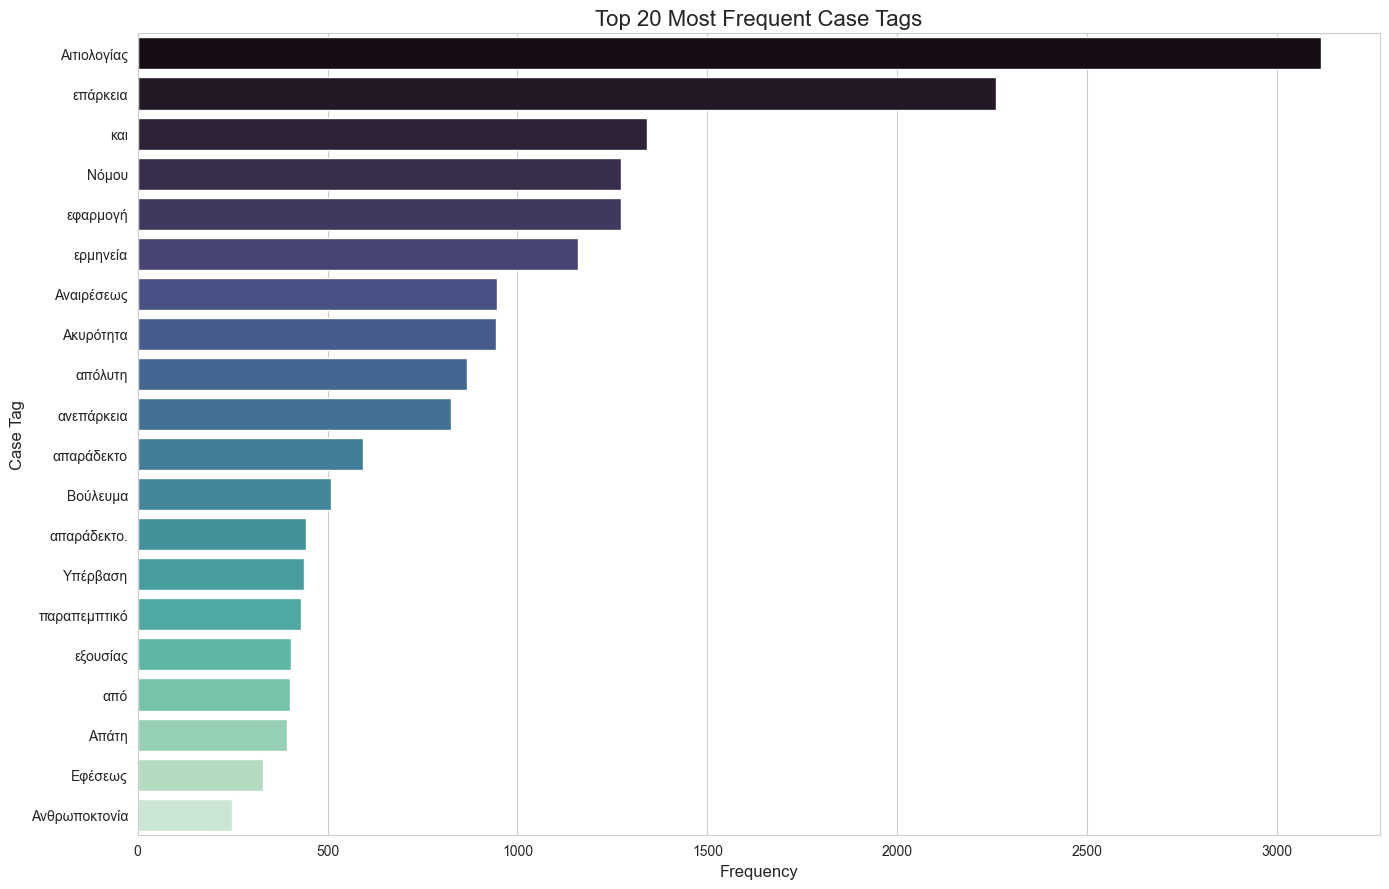


--- Distribution of Number of Tags per Document ---


count    8395.000000
mean        4.792734
std         4.437979
min         0.000000
25%         1.000000
50%         4.000000
75%         7.000000
max        33.000000
Name: num_tags, dtype: float64

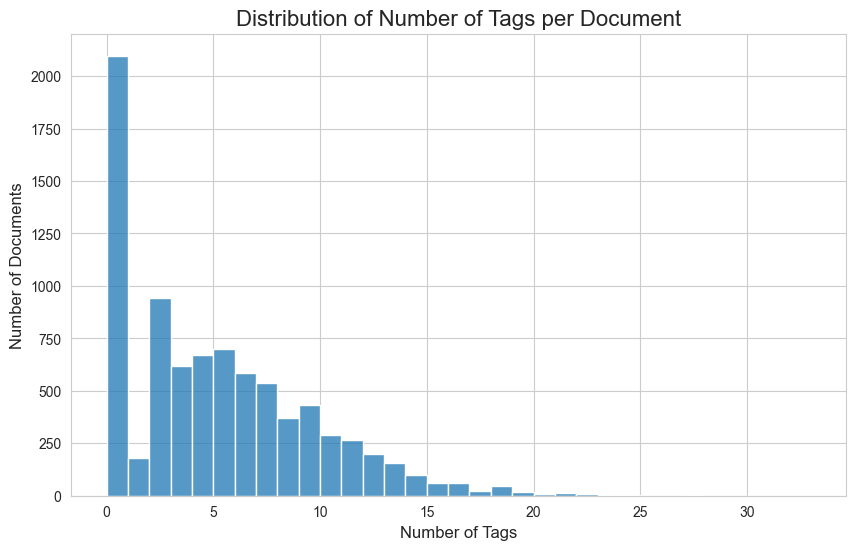


--- Word Cloud of Case Tags ---


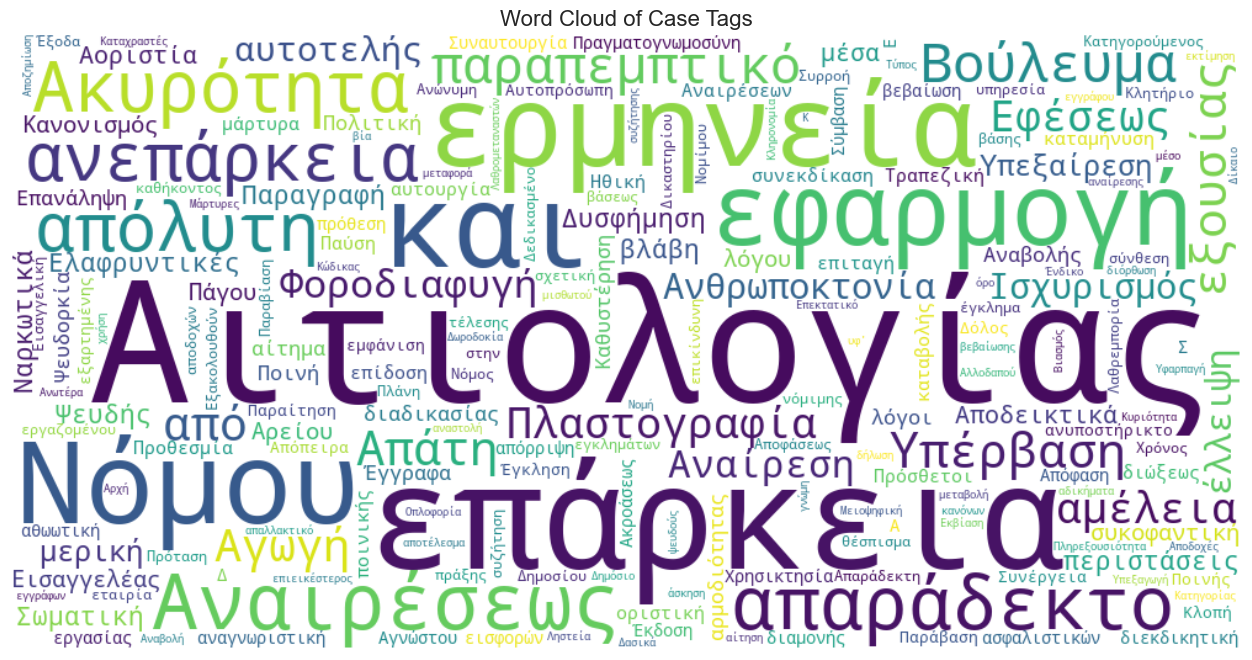

In [8]:
if df is not None and 'case_tags' in df.columns:
    print("\n--- Analyzing 'case_tags' ---")
    
    all_tags = []
    # Handle cases where 'case_tags' might be NaN before attempting to access iloc[0]
    df_tags_dropna = df['case_tags'].dropna()
    non_null_tags_sample = df_tags_dropna.iloc[0] if not df_tags_dropna.empty else None

    if non_null_tags_sample is not None and isinstance(non_null_tags_sample, list):
        print("Processing 'case_tags' as lists of strings.")
        for tags_list in df_tags_dropna: 
            all_tags.extend(tags_list)
    elif non_null_tags_sample is not None and isinstance(non_null_tags_sample, str):
        print("Processing 'case_tags' as strings. Attempting to split by common delimiters.")
        for tags_str_item in df_tags_dropna:
            if isinstance(tags_str_item, str):
                tags_item_processed = tags_str_item.replace(',', ' ').split()
                all_tags.extend([tag.strip() for tag in tags_item_processed if tag.strip()])
            elif isinstance(tags_str_item, list):
                 all_tags.extend(tags_str_item) 
    else:
        print("Could not determine the format of 'case_tags' or column is empty/all NaN. Please inspect the data.")

    if all_tags:
        tag_counts = Counter(all_tags)
        print(f"\nTotal number of unique tags: {len(tag_counts)}")
        print("\nTop 10 most frequent tags (Counts):")
        for tag, count in tag_counts.most_common(10):
            print(f"- {tag}: {count}")
        
        print("\nTop 10 most frequent tags with percentages (relative to total tags counted):")
        total_tag_occurrences = sum(tag_counts.values())
        if total_tag_occurrences > 0:
            for tag, count in tag_counts.most_common(10):
                percentage = (count / total_tag_occurrences) * 100
                print(f"- {tag}: {count} ({percentage:.2f}%)")
        
        single_occurrence_tags = sum(1 for count in tag_counts.values() if count == 1)
        total_unique_tags = len(tag_counts)
        if total_unique_tags > 0:
            print(f"\nNumber of tags appearing only once: {single_occurrence_tags} ({(single_occurrence_tags/total_unique_tags)*100:.2f}% of total unique tags)")
        else:
            print("\nNo tags found to analyze for single occurrences.")

        # Plotting the distribution of top 20 case_tags
        most_common_tags = tag_counts.most_common(20)
        if most_common_tags:
            tags_df_plot = pd.DataFrame(most_common_tags, columns=['Tag', 'Frequency'])
            plt.figure(figsize=(14, 9))
            sns.barplot(x='Frequency', y='Tag', data=tags_df_plot, palette='mako')
            plt.title('Top 20 Most Frequent Case Tags', fontsize=16)
            plt.xlabel('Frequency', fontsize=12)
            plt.ylabel('Case Tag', fontsize=12)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.tight_layout()
            plt.show()
            
        # Distribution of number of tags per document
        # Ensure NaNs in 'case_tags' are handled, e.g., by filling with empty string or list before apply
        # The current lambda handles NaNs by resulting in 0 for len(x) if x is not a list or string (e.g. float NaN)
        df['num_tags'] = df['case_tags'].apply(lambda x: len(x) if isinstance(x, list) else (len(x.replace(',', ' ').split()) if isinstance(x, str) else 0) )
        print("\n--- Distribution of Number of Tags per Document ---")
        display(df['num_tags'].describe())
        
        plt.figure(figsize=(10, 6))
        # Ensure bins is at least 1, handle case where max is 0 or df['num_tags'] is empty
        max_tags = df['num_tags'].max() if not df['num_tags'].empty else 0
        num_bins = max(1, int(max_tags))
        sns.histplot(df['num_tags'], bins=num_bins, kde=False)
        plt.title('Distribution of Number of Tags per Document', fontsize=16)
        plt.xlabel('Number of Tags', fontsize=12)
        plt.ylabel('Number of Documents', fontsize=12)
        plt.show()

        # Word Cloud
        if wordcloud_available:
            print("\n--- Word Cloud of Case Tags ---")
            text_for_wordcloud = " ".join(all_tags) # Use the 'all_tags' list which contains individual tags
            if text_for_wordcloud.strip(): # Ensure there's text to generate wordcloud
                wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False).generate(text_for_wordcloud)
                plt.figure(figsize=(16, 8))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                plt.title('Word Cloud of Case Tags', fontsize=16)
                plt.show()
            else:
                print("Skipping word cloud as no text from tags is available.")
        else:
            print("\nSkipping Word Cloud generation as WordCloud library is not available.")
    else:
        print("No tags found to process or plot after attempting to parse 'case_tags' column.")
else:
    print("\n'case_tags' column not found or DataFrame not loaded.")

### Σχόλια για την `case_tags`:

*   Οι ετικέτες (`case_tags`) φαίνεται να είναι αποθηκευμένες ως συμβολοσειρές που χρειάζονται διαχωρισμό. Μετά την επεξεργασία (διαχωρισμός με βάση το κόμμα ή το κενό), προέκυψαν **1376 μοναδικές μεμονωμένες ετικέτες**.
*   Οι πιο συχνές ετικέτες είναι "**Αιτιολογίας**" (3115 εμφανίσεις, 7.74% του συνόλου των εμφανίσεων ετικετών), "**επάρκεια**" (2259 εμφανίσεις, 5.61%), "**και**" (1340 εμφανίσεις, 3.33%), "**Νόμου**" (3.16%) και "**εφαρμογή**" (3.16%). Αυτό υποδηλώνει ότι θέματα σχετικά με την αιτιολογία και την εφαρμογή του νόμου είναι κυρίαρχα.
*   Παρατηρείται σημαντική αραιότητα (sparsity) και εδώ: **418 ετικέτες (το 30.38% των μοναδικών ετικετών)** εμφανίζονται **μόνο μία φορά**.
*   **Κατανομή Αριθμού Ετικετών ανά Έγγραφο:**
    *   Κάθε έγγραφο έχει κατά μέσο όρο **~4.79 ετικέτες**.
    *   Ο αριθμός των ετικετών κυμαίνεται από **0** (για έγγραφα με NaN `case_tags` ή χωρίς ετικέτες μετά την επεξεργασία) έως **33 ετικέτες**.
    *   Η διάμεσος (50%) είναι 4 ετικέτες, υποδεικνύοντας ότι τα μισά έγγραφα έχουν 4 ή λιγότερες ετικέτες.
    *   Το ιστόγραμμα και το συννεφόλεξο (word cloud) παρέχουν οπτικές αναπαραστάσεις αυτής της κατανομής και της συχνότητας των ετικετών, αντίστοιχα.
*   Τα ευρήματα αυτά (κοινές θεματικές, αραιότητα ετικετών, μεταβλητό βάθος επισήμανσης) είναι σημαντικά για την κατανόηση της φύσης των ετικετών και θα επηρεάσουν την επιλογή μεθόδων για την ομαδοποίηση και την αναπαράσταση κειμένων.

## 4. Συμπέρασμα EDA

Η διερευνητική ανάλυση των `case_category` και `case_tags` μας έδωσε μια πιο ολοκληρωμένη εικόνα για την κατανομή, τη συχνότητα και τα χαρακτηριστικά των θεματικών ετικετών στο dataset `DominusTea/GreekLegalSum`.

**Βασικά Ευρήματα:**
1.  **Ποιότητα Δεδομένων:** Ένα σημαντικό ποσοστό (~25%) των εγγραφών στερείται τιμών στις στήλες `case_category` και `case_tags`. Αυτό πρέπει να ληφθεί υπόψη για τις επόμενες φάσεις της ανάλυσης.
2.  **Κατανομή Κατηγοριών (`case_category`):**
    *   Εντοπίστηκαν 399 μοναδικές κατηγορίες, με την "Αιτιολογία" να είναι η κυρίαρχη (7.74%).
    *   Παρατηρείται έντονη "long-tail" κατανομή, με το 50.88% των κατηγοριών να εμφανίζονται μόνο μία φορά.
3.  **Κατανομή Ετικετών (`case_tags`):
    *   Μετά την επεξεργασία, προέκυψαν 1376 μοναδικές μεμονωμένες ετικέτες. Οι πιο συχνές σχετίζονται με την "αιτιολογία", "επάρκεια" και την "εφαρμογή του νόμου".
    *   Υπάρχει επίσης σημαντική αραιότητα, με το 30.38% των ετικετών να εμφανίζονται μόνο μία φορά.
    *   Τα έγγραφα έχουν κατά μέσο όρο ~4.8 ετικέτες, με εύρος από 0 έως 33.
